In [1]:
# Importing the data set
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'Dataset.xlsx' with the actual path to your Excel file
file_path = 'Dataset_.csv'

# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())


            Timestamp             Name  Age   Gender  \
0  1/29/2024 21:21:30               BT    50    Male   
1  1/29/2024 21:29:57         Anusha T    21  Female   
2  1/29/2024 21:58:59  Jonathan George    31    Male   
3  1/29/2024 22:01:20             B. N    46  Female   
4  1/29/2024 22:10:58      Subhiksha V    21  Female   

                Organization Country          Profession  Productivity_level  \
0                        VST   India            Service                    5   
1  Moder An Archwell Company   India             Finance                   4   
2                     AddRec   India  Digital marketing                    3   
3           Spartan School.    India             Teacher                   2   
4                  Kaar Tech   India                  IT                   3   

   Mental_wellbeing  Work_life_balance  \
0                 3                  3   
1                 4                  4   
2                 3                  2   
3             

In [2]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 81
Number of columns: 11


In [3]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['Timestamp', 'Name','Organization']
df = df.drop(columns=columns_to_drop)


# Display the DataFrame after removing columns
print(df.head())

   Age   Gender Country          Profession  Productivity_level  \
0    50    Male   India            Service                    5   
1    21  Female   India             Finance                   4   
2    31    Male   India  Digital marketing                    3   
3    46  Female   India             Teacher                   2   
4    21  Female   India                  IT                   3   

   Mental_wellbeing  Work_life_balance  \
0                 3                  3   
1                 4                  4   
2                 3                  2   
3                 4                  4   
4                 3                  3   

                                              Impact  
0  I don't work with AI assistants but I think it...  
1  I don't work with AI assistants and hence I do...  
2  I don't work with AI assistants and hence I do...  
3  I don't work with AI assistants but I think it...  
4        I work with AI assistants and it is helpful  


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
# Handle missing values (imputation or removal)
df = df.dropna() # Example: removing rows with missing values


Age                   0
Gender                0
Country               0
Profession            0
Productivity_level    0
Mental_wellbeing      0
Work_life_balance     0
Impact                0
dtype: int64


In [5]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

            Age   Productivity_level  Mental_wellbeing  Work_life_balance
count  81.000000           81.000000         81.000000          81.000000
mean   25.444444            3.777778          3.592593           3.641975
std     9.818350            0.851469          0.905232           0.952741
min    19.000000            2.000000          2.000000           1.000000
25%    21.000000            3.000000          3.000000           3.000000
50%    21.000000            4.000000          4.000000           4.000000
75%    24.000000            4.000000          4.000000           4.000000
max    69.000000            5.000000          5.000000           5.000000


In [6]:
# Get all distinct values in the 'Country' column
distinct_countries = df['Country'].unique()

# Display the distinct values
print(distinct_countries)


['India' 'India ' 'Texas, USA ' 'INDIA' 'Inida']


In [7]:
# Replace variations of 'India' with a single value 'India'
df['Country'] = df['Country'].replace(['India ', 'INDIA', 'Inida', 'Texas, USA '], 'India')

# Display the DataFrame after replacement
print(df['Country'].unique())


['India']


In [8]:
# Get all distinct values in the 'profession' column
distinct_profession = df['Profession'].unique()

# Display the distinct values
print(distinct_profession)

['Service ' 'Finance' 'Digital marketing ' 'Teacher' 'IT' 'Business'
 'Student ' 'Student' 'IT Hardware' 'Deep Learning Engineer' 'SDE'
 'AI Engineer' 'Full stack engineer/QA' 'Medical' 'Engineering'
 'Physiotherapist ' 'Research' 'Software Engineer' 'Software Developer'
 '35 years ' 'Trainee' 'Graphic Designer' 'HR' 'Marketing Agent'
 'Insurance operations Associate ' 'Bsc NURSING' 'IT ' 'It']


In [9]:
df['Profession'] = df['Profession'].replace(['IT','IT ','IT Hardware','It'], 'IT')
df['Profession'] = df['Profession'].replace(['SDE','AI Engineer','Full stack engineer/QA','Software Engineer','Software Developer','35 years ','Trainee','Deep Learning Engineer','Engineering'], 'Engineer')
df['Profession'] = df['Profession'].replace(['Finance','Insurance operations Associate '], 'Finance')
df['Profession'] = df['Profession'].replace(['Medical','Physiotherapist ','Bsc NURSING','Research'], 'Medical')
df['Profession'] = df['Profession'].replace(['Business','Graphic Designer'], 'Business')
df['Profession'] = df['Profession'].replace(['Teacher','Student ','Student'], 'Education')
df['Profession'] = df['Profession'].replace(['Digital marketing ','Marketing Agent','Service ','HR'], 'Marketing')


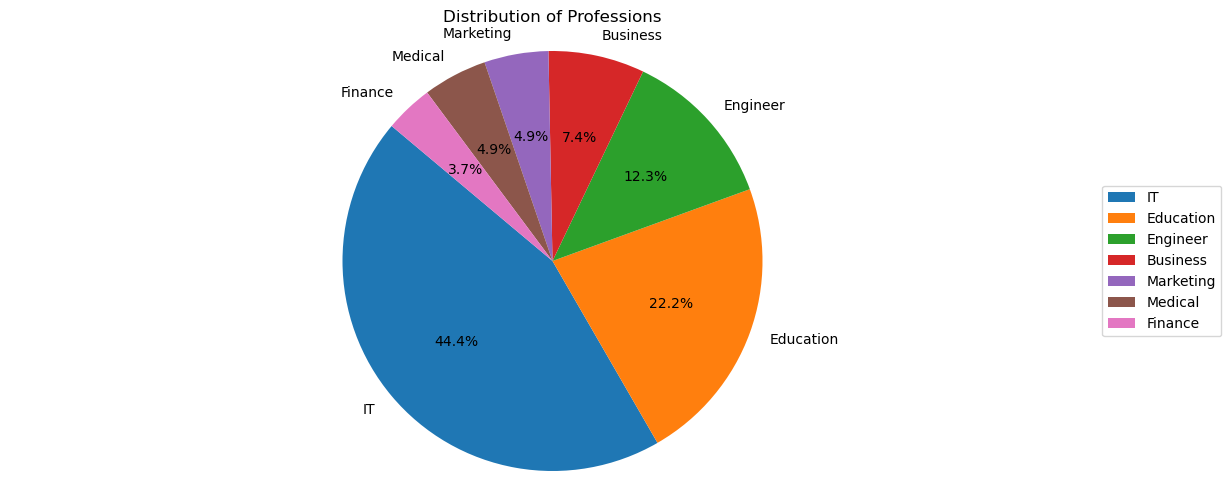

In [10]:
import matplotlib.pyplot as plt
profession_counts = df['Profession'].value_counts()

plt.figure(figsize=(14, 6))
pie_chart = plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Professions')

# Create legend on the right with profession labels
plt.legend(profession_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

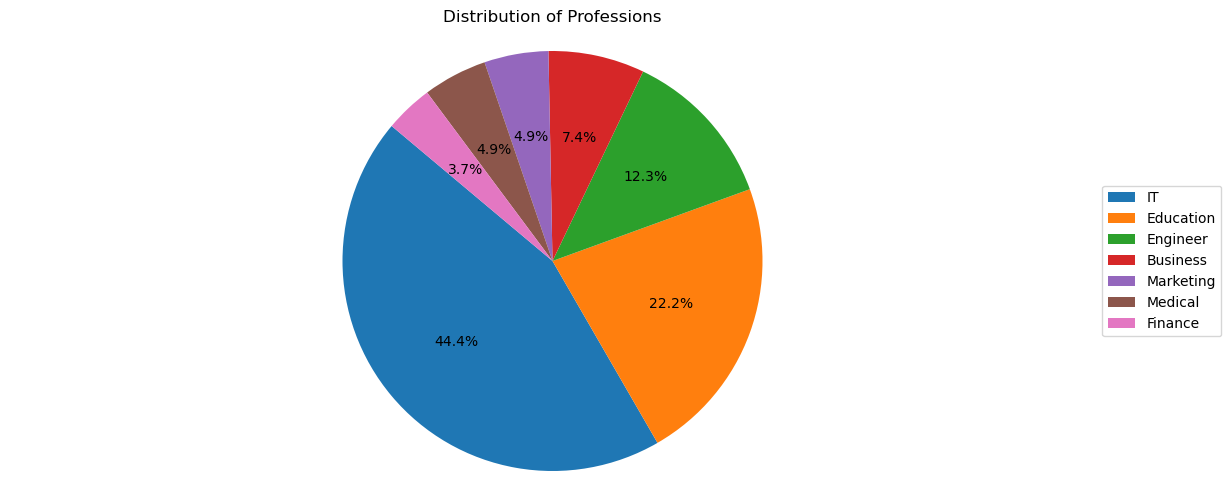

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already defined profession_counts and df['Profession'] exists

plt.figure(figsize=(14, 6))
pie_chart = plt.pie(profession_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Professions')

# Create legend on the right with profession labels
plt.legend(profession_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Gender
Male      42
Female    39
Name: count, dtype: int64


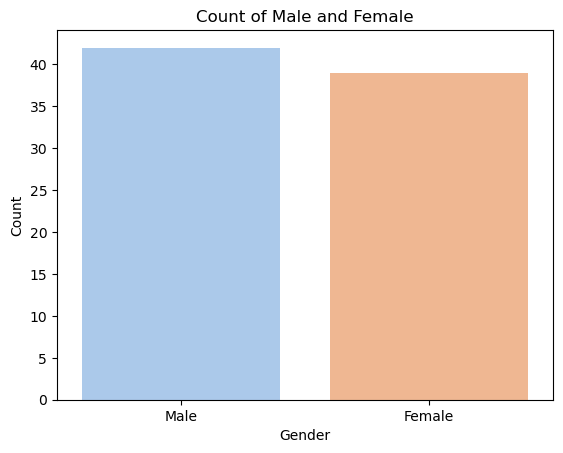

In [12]:
import seaborn as sns

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)
# Plot a bar chart using Seaborn
sns.countplot(x='Gender', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Male and Female')
plt.show()


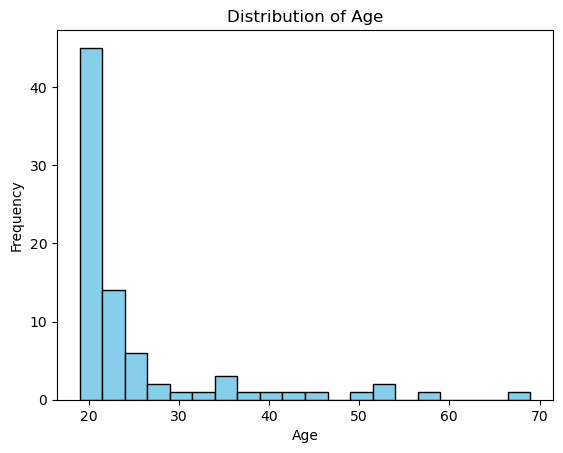

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'Age' column
plt.hist(df['Age '], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


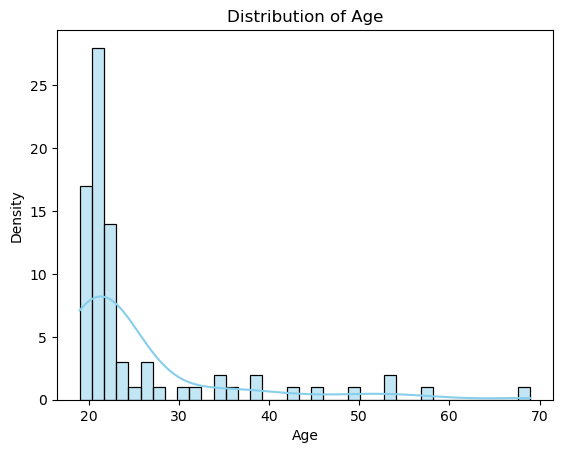

In [14]:
import seaborn as sns

# Plot a kernel density plot using Seaborn
sns.histplot(df['Age '], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.show()


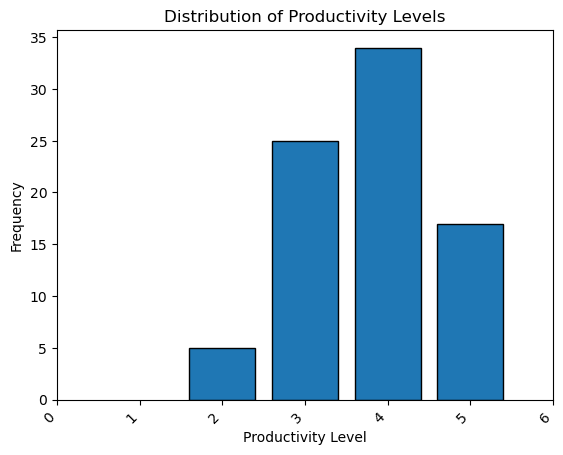

In [15]:
import matplotlib.pyplot as plt

# Assuming df['Productivity_level'] contains categorical data representing productivity levels

# Count the frequency of each productivity level
productivity_counts = df['Productivity_level'].value_counts()

# Extracting productivity levels and their frequencies
productivity_levels = productivity_counts.index
frequency = productivity_counts.values

# Creating a bar chart
plt.bar(productivity_levels, frequency, edgecolor='black')

# Labeling the axes and title
plt.xlabel('Productivity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Productivity Levels')

# Rotating x-axis labels for better readability (if needed)
plt.xticks([0,1,2,3,4,5,6],rotation=45, ha='right')

# Display the plot
plt.show()


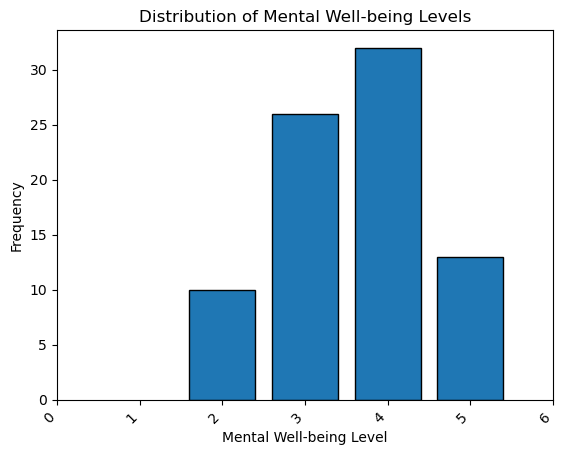

In [16]:
import matplotlib.pyplot as plt

# Assuming df['Productivity_level'] contains categorical data representing productivity levels

# Count the frequency of each productivity level
wellbeing_counts = df['Mental_wellbeing'].value_counts()

# Extracting productivity levels and their frequencies
wellbeing_levels = wellbeing_counts.index
frequency = wellbeing_counts.values

# Creating a bar chart
plt.bar(wellbeing_levels, frequency, edgecolor='black')

# Labeling the axes and title
plt.xlabel('Mental Well-being Level')
plt.ylabel('Frequency')
plt.title('Distribution of Mental Well-being Levels')

# Rotating x-axis labels for better readability (if needed)
plt.xticks([0,1,2,3,4,5,6], rotation=45, ha='right')

# Display the plot
plt.show()


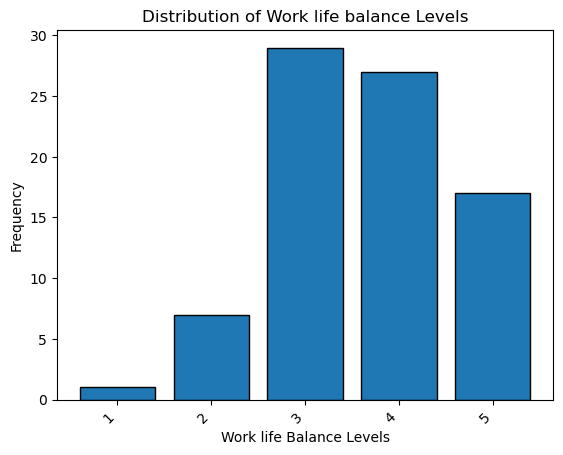

In [17]:


# Assuming df['Productivity_level'] contains categorical data representing productivity levels

# Count the frequency of each productivity level
worklifebalance_counts = df['Work_life_balance'].value_counts()

# Extracting productivity levels and their frequencies
wlb_levels = worklifebalance_counts.index
frequency = worklifebalance_counts.values

# Creating a bar chart
plt.bar(wlb_levels, frequency, edgecolor='black')

# Labeling the axes and title
plt.xlabel('Work life Balance Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Work life balance Levels')

# Rotating x-axis labels for better readability (if needed)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


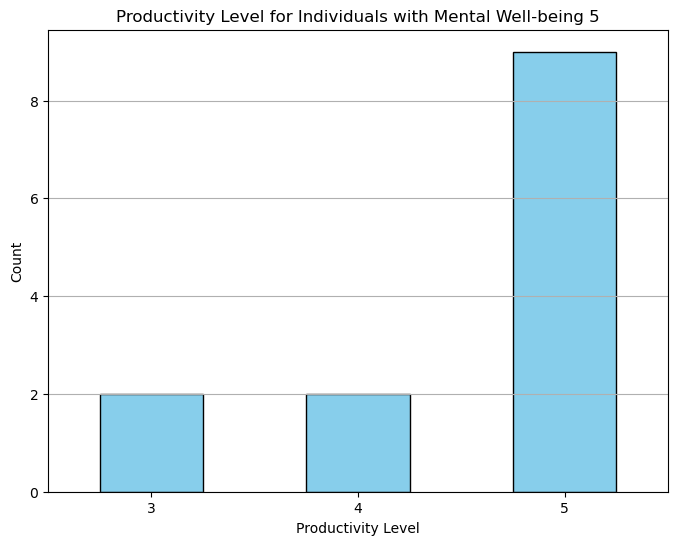

In [18]:
filtered_df = df[df['Mental_wellbeing'] == 5]

# Check if the filtered DataFrame is empty
if not filtered_df.empty:
    # Count the occurrences of each 'Productivity_level' value ranging from 1 to 5
    productivity_counts = filtered_df['Productivity_level'].value_counts().sort_index()

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    productivity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Productivity Level for Individuals with Mental Well-being 5')
    plt.xlabel('Productivity Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("No individuals with Mental Well-being 1 found in the dataset.")

In [19]:
# productivity level and mental well being distributiins are almost same so what can we infer from this?


In [20]:

# import matplotlib.pyplot as plt

# # Histogram for 'Productivity_level'
# plt.hist(df['Work_life_balance'], bins=5, edgecolor='black')
# plt.xlabel('Work life balance')
# plt.ylabel('Frequency')
# plt.title('Distribution of Work life balance Levels')
# plt.show()

In [21]:
# Scatter plot for 'Productivity_level' and 'Mental_wellbeing'
# plt.scatter( df['Mental_wellbeing'], df['Productivity_level'])
# plt.ylabel('Productivity Level')
# plt.xlabel('Mental Well-being')
# plt.title('Scatter Plot of Productivity vs. Mental Well-being')
# plt.show()


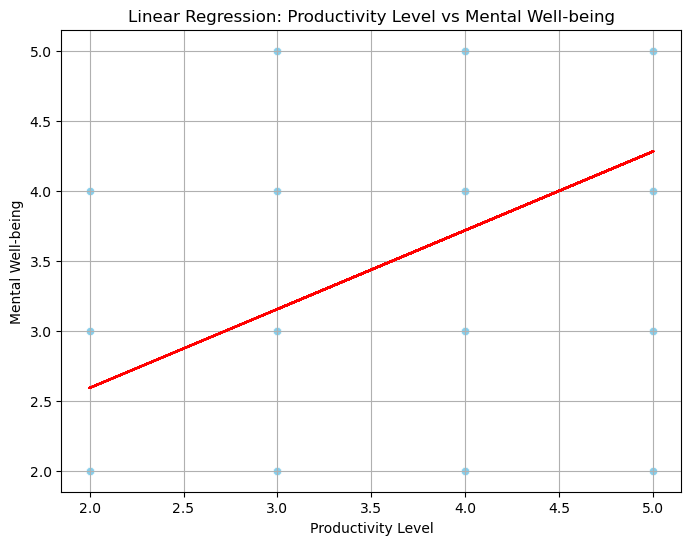

In [22]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Productivity_level'], df['Mental_wellbeing'])

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Productivity_level', y='Mental_wellbeing', data=df, color='skyblue')
plt.title('Linear Regression: Productivity Level vs Mental Well-being')
plt.xlabel('Productivity Level')
plt.ylabel('Mental Well-being')

# Plot regression line
x = np.array(df['Productivity_level'])
y = slope * x + intercept
plt.plot(x, y, color='red')

# Show the plot
plt.grid(True)
plt.show()

Gender
Female    3.692308
Male      3.857143
Name: Productivity_level, dtype: float64


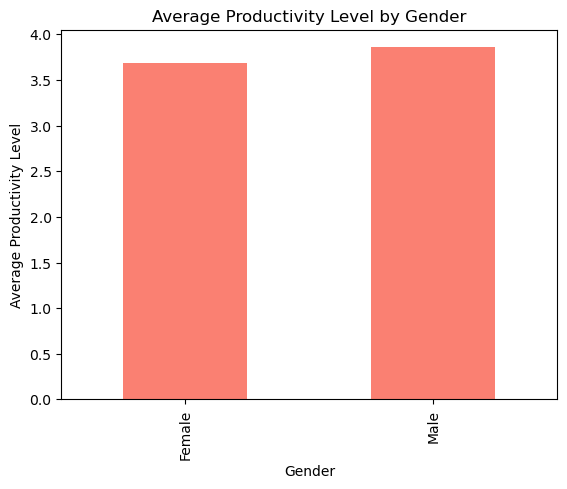

In [23]:
# Grouped bar chart for 'Gender' and 'Productivity_level'
grouped_data = df.groupby('Gender')['Productivity_level'].mean()
print(grouped_data)
grouped_data.plot(kind='bar', color='salmon')
plt.xlabel('Gender')
plt.ylabel('Average Productivity Level')
plt.title('Average Productivity Level by Gender')
plt.show()


In [34]:
# Count of responses to 'Impact' question
impact_counts = df['Impact'].value_counts()
print(impact_counts)


Impact
I work with AI assistants and it is helpful                          37
I don't work with AI assistants but I think it might be helpful      23
I don't work with AI assistants and hence I don't have an opinion    10
I work with AI assistants. It doesn't impact much                     9
I don't like AI assistants. I feel it as a threat.                    1
I work with AI and it is helpful                                      1
Name: count, dtype: int64


In [35]:
df['Impact'] = df['Impact'].replace(['I work with AI and it is helpful'], 'I work with AI assistants and it is helpful')
# df['Impact'] = df['Impact'].replace(['I don\'t work with AI assistants and hence I don\'t have an opinion'], 'I work with AI assistants. It doesn\'t impact much')

In [36]:
# Count of responses to 'Impact' question
impact_counts = df['Impact'].value_counts()
print(impact_counts)

Impact
I work with AI assistants and it is helpful                          38
I don't work with AI assistants but I think it might be helpful      23
I don't work with AI assistants and hence I don't have an opinion    10
I work with AI assistants. It doesn't impact much                     9
I don't like AI assistants. I feel it as a threat.                    1
Name: count, dtype: int64


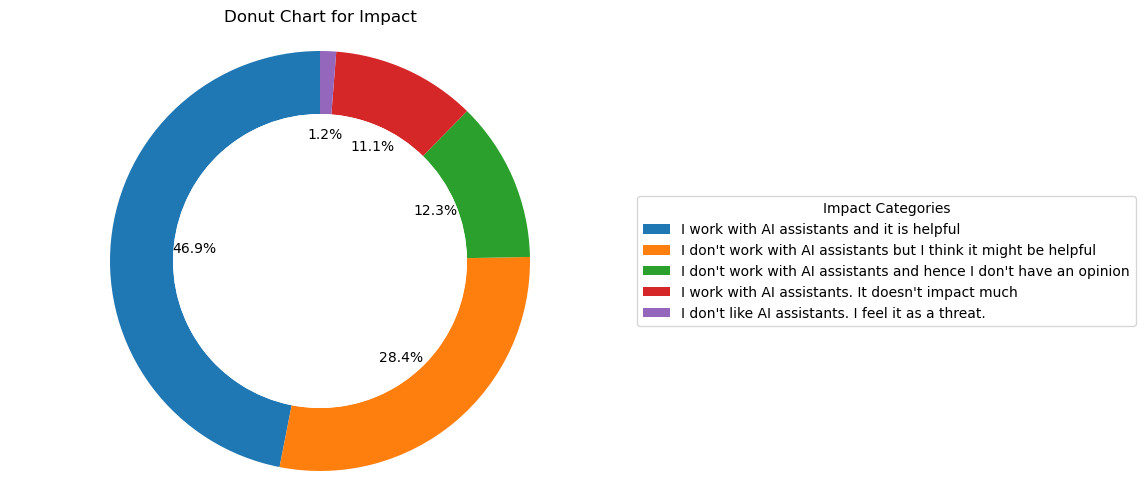

In [42]:
impact_counts = df['Impact'].value_counts()

# Define colors for each category
colors = plt.cm.tab10.colors[:len(impact_counts)]

# Creating a donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(impact_counts, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Draw a circle to make it a donut chart
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.title('Donut Chart for Impact')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend on the right side
plt.legend(impact_counts.index, title='Impact Categories', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

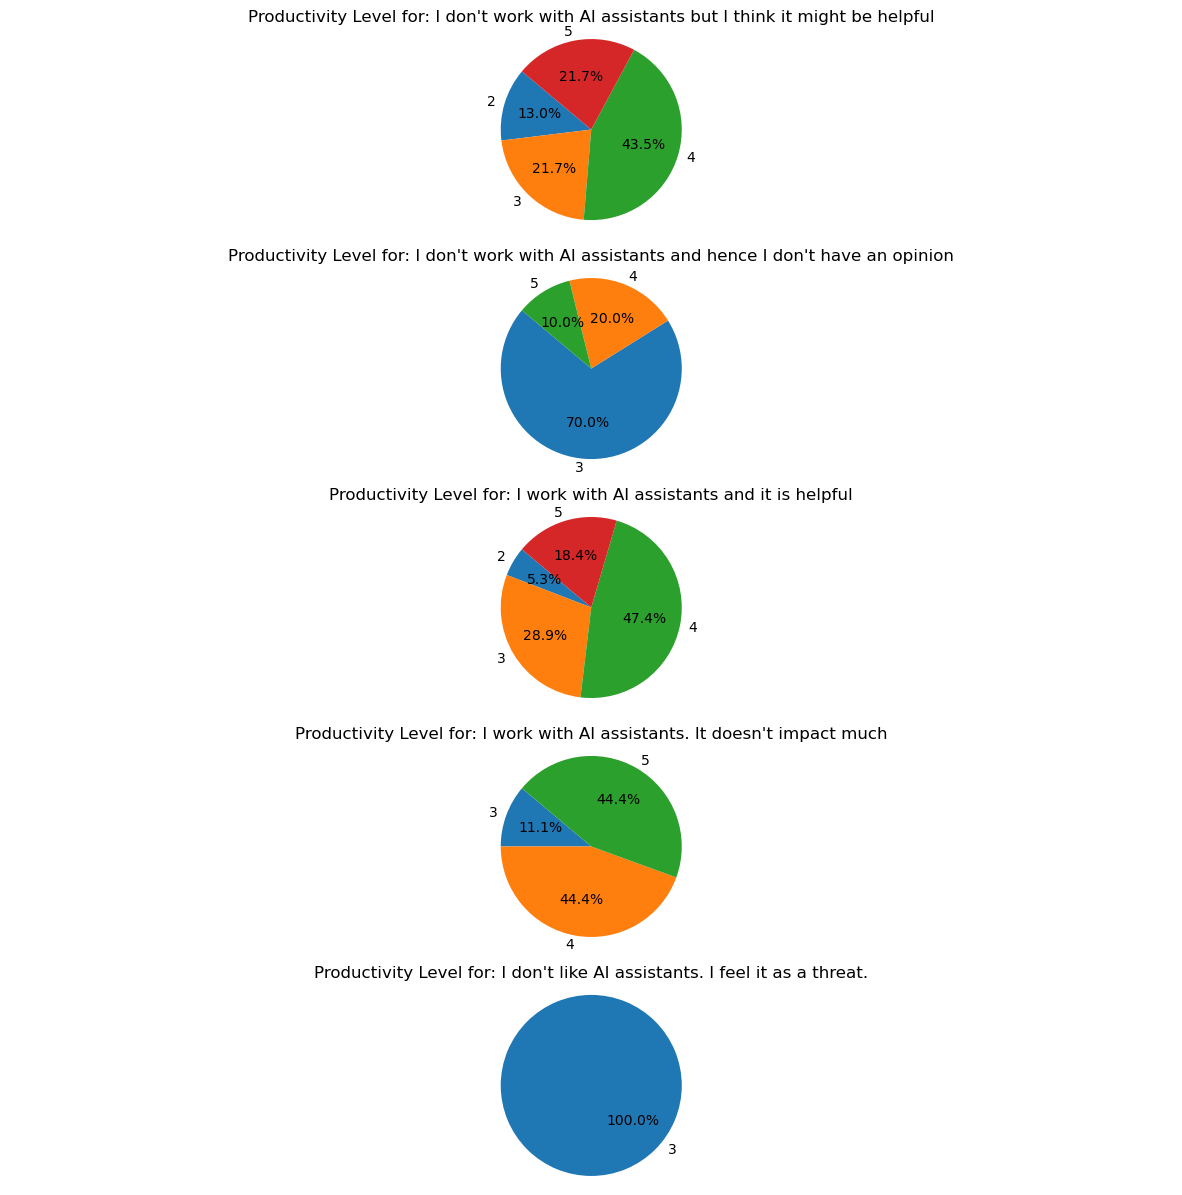

In [38]:
categories = df['Impact'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

# Plot pie charts for each category
for i, category in enumerate(categories):
    subset_df = df[df['Impact'] == category]
    productivity_counts = subset_df['Productivity_level'].value_counts().sort_index()

    # Plot pie chart
    axes[i].pie(productivity_counts, labels=productivity_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Productivity Level for: {category}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()

plt.show()

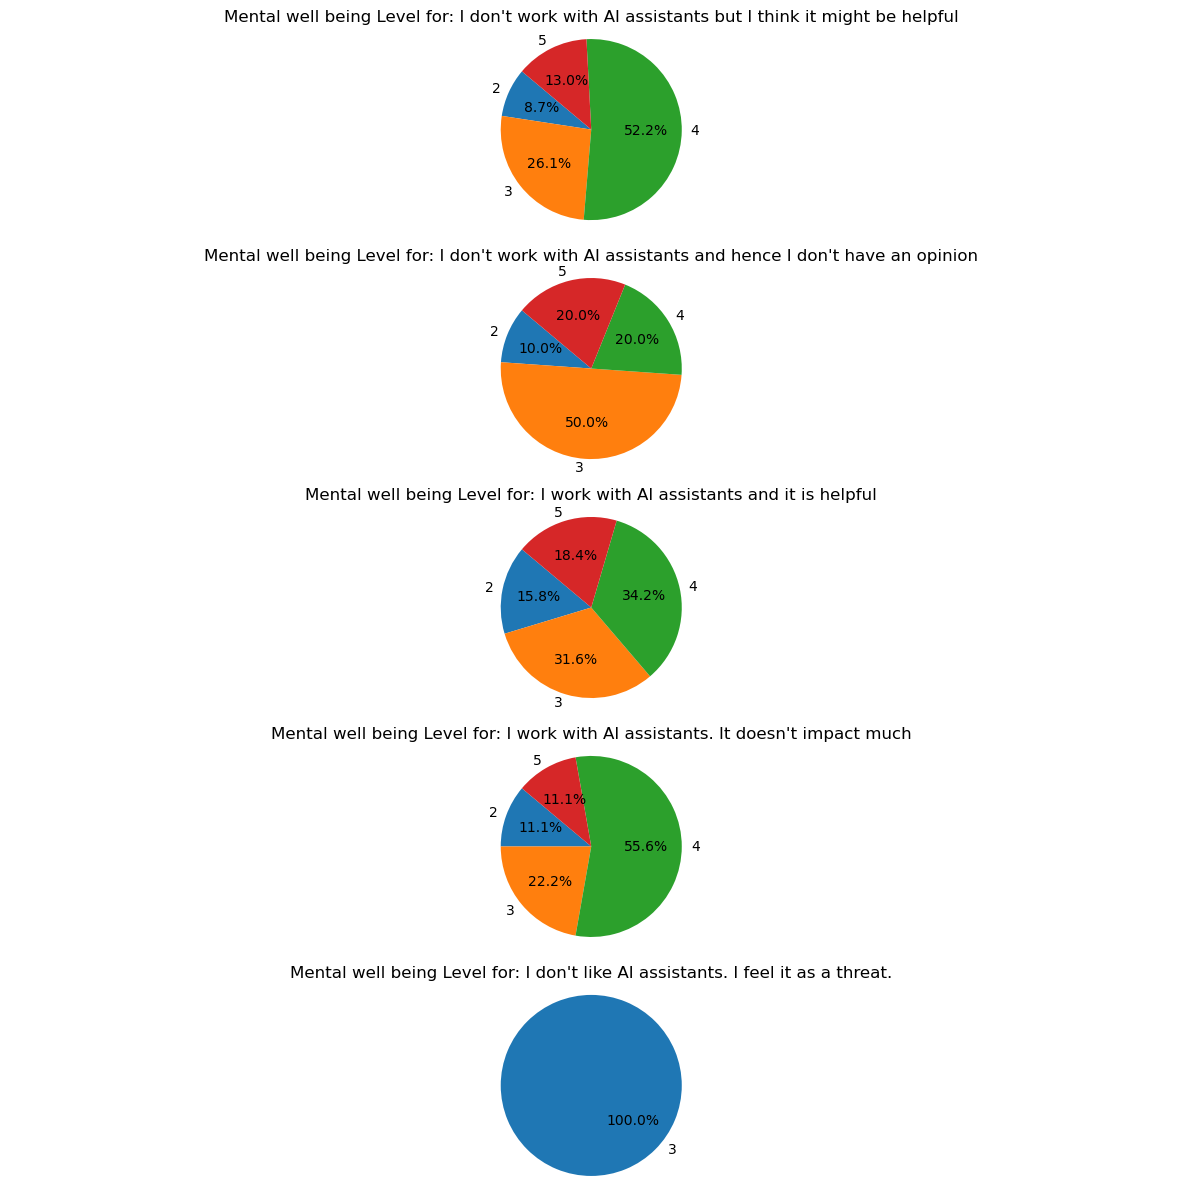

In [28]:
categories = df['Impact'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

# Plot pie charts for each category
for i, category in enumerate(categories):
    subset_df = df[df['Impact'] == category]
    productivity_counts = subset_df['Mental_wellbeing'].value_counts().sort_index()

    # Plot pie chart
    axes[i].pie(productivity_counts, labels=productivity_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Mental well being Level for: {category}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()

plt.show()

In [26]:
#1. Correlation Analysis:
# Compute the correlation coefficient
correlation_coefficient = df['Productivity_level'].corr(df['Mental_wellbeing'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 0.5297684286178799


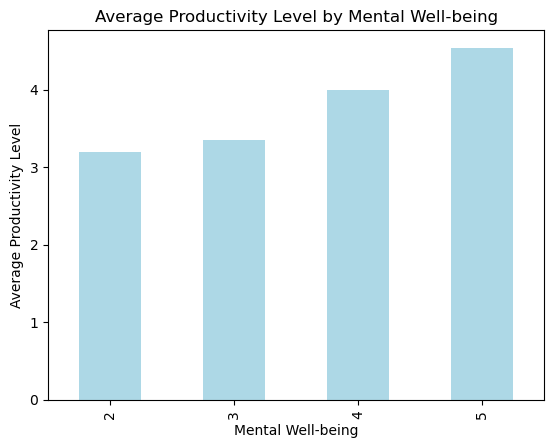

In [27]:
# Grouped bar chart for 'Productivity_level' and average 'Mental_wellbeing'
grouped_data = df.groupby('Mental_wellbeing')['Productivity_level'].mean()
grouped_data.plot(kind='bar', color='lightblue')
plt.xlabel('Mental Well-being')
plt.ylabel('Average Productivity Level')
plt.title('Average Productivity Level by Mental Well-being')
plt.show()

In [28]:
import statsmodels.api as sm

# Perform linear regression
X = sm.add_constant(df['Productivity_level'])
model = sm.OLS(df['Mental_wellbeing'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Mental_wellbeing   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     30.82
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.66e-07
Time:                        17:35:51   Log-Likelihood:                -93.025
No. Observations:                  81   AIC:                             190.0
Df Residuals:                      79   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4649      0

In [29]:
# impact with gender

In [30]:
# # Grouped analysis of 'Impact' by demographics
# grouped_impact = df.groupby('Gender')['Impact'].value_counts(normalize=True).unstack() * 100
# print("Impact by Gender:")
# print(grouped_impact)


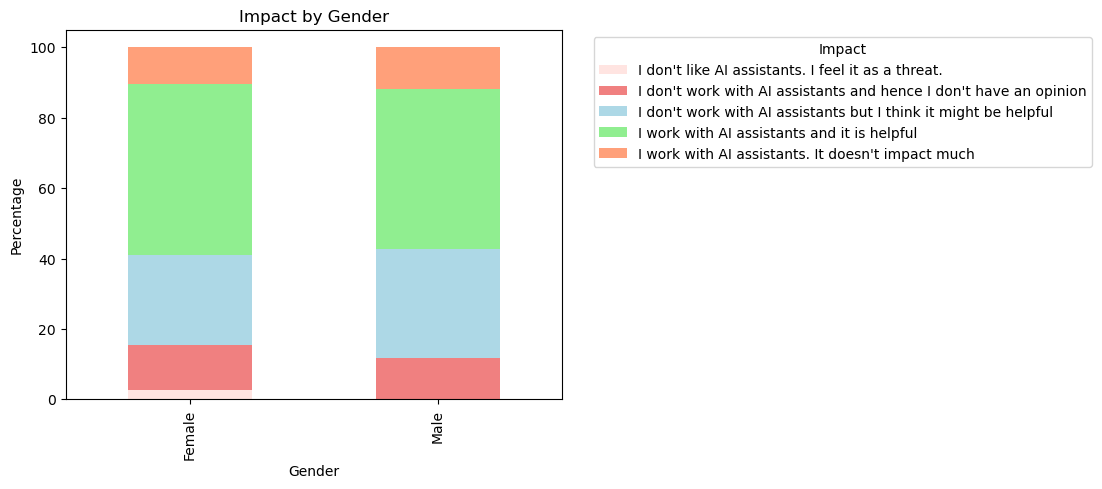

In [31]:
import matplotlib.pyplot as plt

# Grouped analysis of 'Impact' by demographics
grouped_impact = df.groupby('Gender')['Impact'].value_counts(normalize=True).unstack() * 100

# Plotting a grouped bar chart
grouped_impact.plot(kind='bar', stacked=True, color=['MistyRose','lightcoral','lightblue','lightgreen' ,'lightsalmon'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Impact by Gender')
plt.legend(title='Impact', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


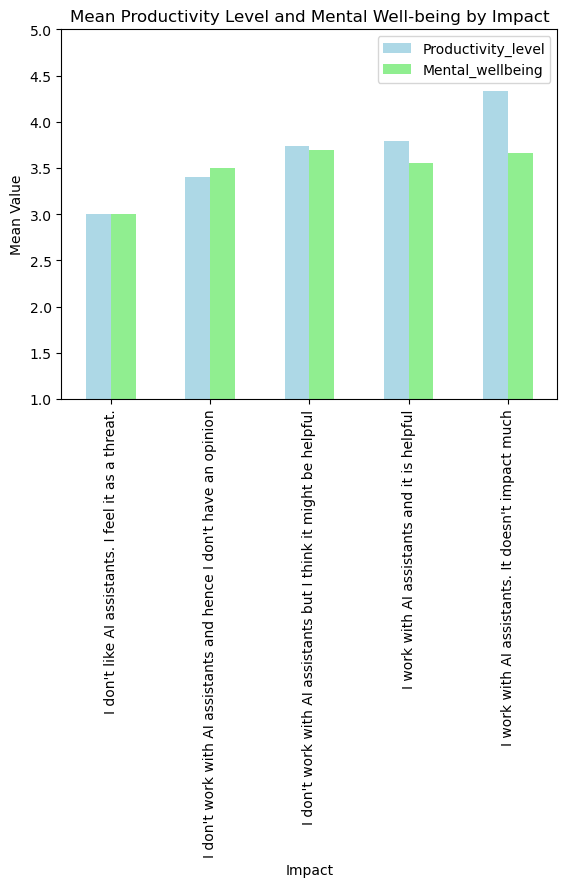

In [32]:
grouped_data = df.groupby('Impact').agg({'Productivity_level': 'mean', 'Mental_wellbeing': 'mean'})

# Plotting the grouped bar chart
ax = grouped_data.plot(kind='bar', color=['lightblue', 'lightgreen'])

# Set labels and title
plt.xlabel('Impact')
plt.ylabel('Mean Value')
plt.title('Mean Productivity Level and Mental Well-being by Impact')

# Set y-axis scale from 1 to 5
plt.ylim(1, 5)

# Show the plot
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).

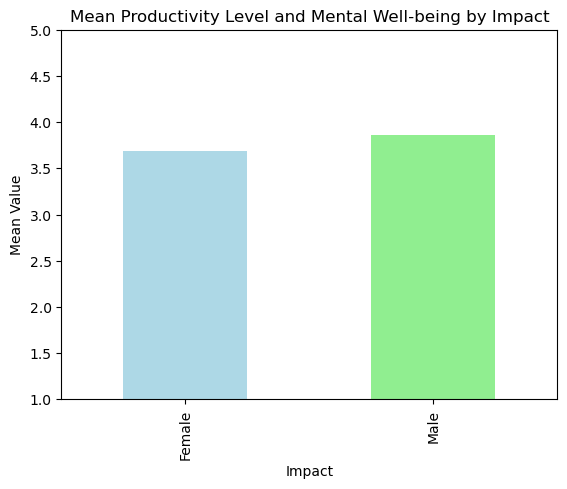